## Script to Find and List Files in a Directory

In [1]:
import os
import glob

def find_tsv_files(directory):
    search_pattern = os.path.join(directory, '*.tsv')
    tsv_files = glob.glob(search_pattern)
    updated_files = [t.replace("\\", "/") for t in tsv_files]
    tsv_dict = {os.path.splitext(os.path.basename(t))[0]: t for t in updated_files}
    return tsv_dict
    
directory_path = '../Dataset/'
tsv_dict = find_tsv_files(directory_path)

for file_name, file_path in tsv_dict.items():
    print(f"{file_name}: {file_path}")

contacts: ../Dataset/contacts.tsv
content: ../Dataset/content.tsv
events: ../Dataset/events.tsv
organisations: ../Dataset/organisations.tsv
recommendations: ../Dataset/recommendations.tsv
users: ../Dataset/users.tsv


# Data Analysis for Each Files

### Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

### Display the info and column details

In [2]:
def data_info(df):
    # Display basic information about the DataFrame
    print("info")
    print(df.info())
    print("-" * 125)

    # Display the columns in the DataFrame
    print("columns")
    print(df.columns)
    print("-" * 125)

### Data preprocessing

In [3]:
def data_clean_up(df):
    # Check for missing values
    missing_values = df.isnull().sum()

    # Display missing values
    print(missing_values)
    
    # Calculate the total number of rows
    total_rows = contacts_df.shape[0]

    # Identify columns with more than half of the rows being null
    columns_with_many_nulls = missing_values[missing_values > total_rows / 2].index.tolist()

    # Display the columns with more than half rows null
    print()
    print("columns with most of the values null")
    print(columns_with_many_nulls)
    
    return df.drop(columns=columns_with_many_nulls)

### Generating Descriptive Statistics for Numeric and Non-Numeric Columns

In [4]:
def column_stat(df_cleaned):
    # Separate numeric and non-numeric columns
    numeric_columns = df_cleaned.select_dtypes(include=['number', 'datetime']).columns
    non_numeric_columns = df_cleaned.select_dtypes(include=['object']).columns

    # Descriptive statistics for numeric columns
    numeric_stats = df_cleaned[numeric_columns].describe().transpose()

    # Descriptive statistics for non-numeric columns
    non_numeric_stats = df_cleaned[non_numeric_columns].describe().transpose()
    
    return numeric_stats, non_numeric_stats

### Displaying Bar Graphs with Labels

In [5]:
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        plt.annotate(f'{height}',
                     xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

def display_graph(distribution, title, xlabel, ylabel, width, head = False):
    plt.figure(figsize=(width, 6))
    rect = distribution.plot(kind='bar')
    if head:
        rect = distribution.head(20).plot(kind='bar')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    add_labels(rect.patches)
    plt.show()

### Displaying a Word Cloud for Text Data

In [21]:
# Generate word cloud for the description and display it
def generate_word_cloud(all_descriptions):
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

    # Display the word cloud
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Contacts Dataset

In [7]:
contacts_df = pd.read_csv(tsv_dict['contacts'], sep='\t')
contacts_df

,id,first_name,last_name,email,role_id,organisation_id,picture_name,position,gender,city,country,state,created,phone_number,linkedin_url,description
0,145,Don,Lofton,don@gomightymotors.com,0,NaN,NaN,NaN,NaN,Adrian,United States,Michigan,1715265341,NaN,https://www.linkedin.com/in/don-lofton-9a883322,"President/CEO, Elite Group Int'l Inc. Adrian Taxi"
1,146,Anthony,Domangue,Anthony_Domangue@temporary.org,0,NaN,NaN,NaN,NaN,St. Peters,United States,Missouri,1715265341,NaN,https://www.linkedin.com/in/anthony-domangue-8...,Cannabis Cultivator & Consultant
2,147,Kyle,Esplin,Kyle_Esplin@temporary.org,0,NaN,NaN,NaN,NaN,Forfar,Scotland,Angus,1715265341,NaN,https://www.linkedin.com/in/kyle-esplin-03981b4b,"Entertainer: Stage shows, piano sessions & pre..."
3,148,Krysta,Jones,krysta@thehighcountrygirls.com,0,NaN,NaN,NaN,NaN,Miami,United States,Florida,1715265341,NaN,https://www.linkedin.com/in/krysta-jones-860b5...,I help build brand through organic and authent...
4,149,Angel,Colon,angel@entorogroup.com,0,NaN,NaN,NaN,NaN,New York,United States,New York,1715265341,NaN,https://www.linkedin.com/in/angeljcolon/,Managing Director at NY Capital Management Gro...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,442,Tatiana,Calvo,Tatiana_Calvo@temporary.org,0,NaN,NaN,NaN,NaN,Denver,United States,Colorado,1715265341,NaN,https://www.linkedin.com/in/tatiana-calvo-795b...,Regulatory Attorney | Plant Medicines
296,443,Yadi,Alarcon,Yadi_Alarcon@temporary.org,0,NaN,NaN,NaN,NaN,Chicago,United States,Illinois,1715265341,NaN,https://www.linkedin.com/in/yadialarcon/,"Cannabis Brand Representative, Field, Event an..."
297,444,Peter,Barsoom,Peter_Barsoom@temporary.org,0,NaN,NaN,NaN,NaN,New York,United States,New York,1715265341,NaN,https://www.linkedin.com/in/pbarsoom/,"Founder and CEO, 1906"
298,445,Maria,Stabler,Maria_Stabler@temporary.org,0,NaN,NaN,NaN,NaN,Los Angeles,United States,California,1715265341,NaN,https://www.linkedin.com/in/mariastabler/,Director of Sales CA


In [8]:
data_info(contacts_df)

info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               300 non-null    int64  
 1   first_name       300 non-null    object 
 2   last_name        300 non-null    object 
 3   email            300 non-null    object 
 4   role_id          300 non-null    int64  
 5   organisation_id  0 non-null      float64
 6   picture_name     0 non-null      float64
 7   position         0 non-null      float64
 8   gender           0 non-null      float64
 9   city             290 non-null    object 
 10  country          300 non-null    object 
 11  state            295 non-null    object 
 12  created          300 non-null    int64  
 13  phone_number     0 non-null      float64
 14  linkedin_url     300 non-null    object 
 15  description      298 non-null    object 
dtypes: float64(5), int64(3), object(8)
memory usage: 37.6+ KB

In [9]:
# Drop columns with more than 50% missing values
contacts_df_cleaned = data_clean_up(contacts_df)

id                   0
first_name           0
last_name            0
email                0
role_id              0
organisation_id    300
picture_name       300
position           300
gender             300
city                10
country              0
state                5
created              0
phone_number       300
linkedin_url         0
description          2
dtype: int64

columns with most of the values null
['organisation_id', 'picture_name', 'position', 'gender', 'phone_number']


In [23]:
# Fill missing values in 'city' and 'state' with 'Unknown'
contacts_df_cleaned['city'].fillna('Unknown', inplace=True)
contacts_df_cleaned['state'].fillna('Unknown', inplace=True)

# Fill missing values in 'description' with an empty string
contacts_df_cleaned['description'].fillna('', inplace=True)

In [11]:
contacts_df_cleaned

,id,first_name,last_name,email,role_id,city,country,state,created,linkedin_url,description
0,145,Don,Lofton,don@gomightymotors.com,0,Adrian,United States,Michigan,1715265341,https://www.linkedin.com/in/don-lofton-9a883322,"President/CEO, Elite Group Int'l Inc. Adrian Taxi"
1,146,Anthony,Domangue,Anthony_Domangue@temporary.org,0,St. Peters,United States,Missouri,1715265341,https://www.linkedin.com/in/anthony-domangue-8...,Cannabis Cultivator & Consultant
2,147,Kyle,Esplin,Kyle_Esplin@temporary.org,0,Forfar,Scotland,Angus,1715265341,https://www.linkedin.com/in/kyle-esplin-03981b4b,"Entertainer: Stage shows, piano sessions & pre..."
3,148,Krysta,Jones,krysta@thehighcountrygirls.com,0,Miami,United States,Florida,1715265341,https://www.linkedin.com/in/krysta-jones-860b5...,I help build brand through organic and authent...
4,149,Angel,Colon,angel@entorogroup.com,0,New York,United States,New York,1715265341,https://www.linkedin.com/in/angeljcolon/,Managing Director at NY Capital Management Gro...
...,...,...,...,...,...,...,...,...,...,...,...
295,442,Tatiana,Calvo,Tatiana_Calvo@temporary.org,0,Denver,United States,Colorado,1715265341,https://www.linkedin.com/in/tatiana-calvo-795b...,Regulatory Attorney | Plant Medicines
296,443,Yadi,Alarcon,Yadi_Alarcon@temporary.org,0,Chicago,United States,Illinois,1715265341,https://www.linkedin.com/in/yadialarcon/,"Cannabis Brand Representative, Field, Event an..."
297,444,Peter,Barsoom,Peter_Barsoom@temporary.org,0,New York,United States,New York,1715265341,https://www.linkedin.com/in/pbarsoom/,"Founder and CEO, 1906"
298,445,Maria,Stabler,Maria_Stabler@temporary.org,0,Los Angeles,United States,California,1715265341,https://www.linkedin.com/in/mariastabler/,Director of Sales CA


In [12]:
numeric_stats, non_numeric_stats = column_stat(contacts_df_cleaned)

numeric_stats

,count,mean,std,min,25%,50%,75%,max
id,300.0,2.960133e+02,87.265289,1.450000e+02,2.207500e+02,2.965000e+02,3.712500e+02,4.460000e+02
role_id,300.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
created,300.0,1.715265e+09,0.000000,1.715265e+09,1.715265e+09,1.715265e+09,1.715265e+09,1.715265e+09


In [13]:
non_numeric_stats

,count,unique,top,freq
first_name,300,245,Anthony,4
last_name,300,284,Rodriguez,3
email,300,300,don@gomightymotors.com,1
city,300,124,Los Angeles,33
country,300,6,United States,292
state,300,37,California,73
linkedin_url,300,297,https://www.linkedin.com/in/avaconcepcion?utm_...,2
description,300,294,"Acting Chair MA Cannabis Commission, Harvard Y...",2


In [14]:
# Analyze the distribution of contacts by country
country_distribution = contacts_df_cleaned['country'].value_counts()

# Analyze the distribution of contacts by state
state_distribution = contacts_df_cleaned['state'].value_counts()

# Analyze the distribution of contacts by city
city_distribution = contacts_df_cleaned['city'].value_counts()

# Analyze the distribution of roles based on 'role_id'
role_distribution = contacts_df_cleaned['role_id'].value_counts()

# Analyze the timestamps in the 'created' column
contacts_df_cleaned['created'] = pd.to_datetime(contacts_df_cleaned['created'], unit='s')
creation_dates = contacts_df_cleaned['created'].dt.date.value_counts().sort_index()

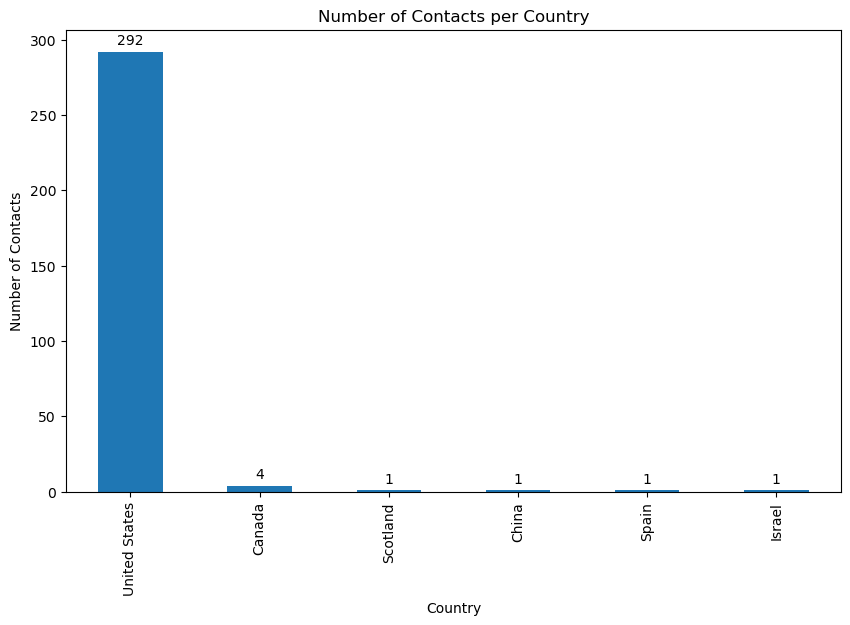

In [15]:
# Bar chart for country distribution with labels
display_graph(country_distribution, 'Number of Contacts per Country', 'Country', 'Number of Contacts', 10)

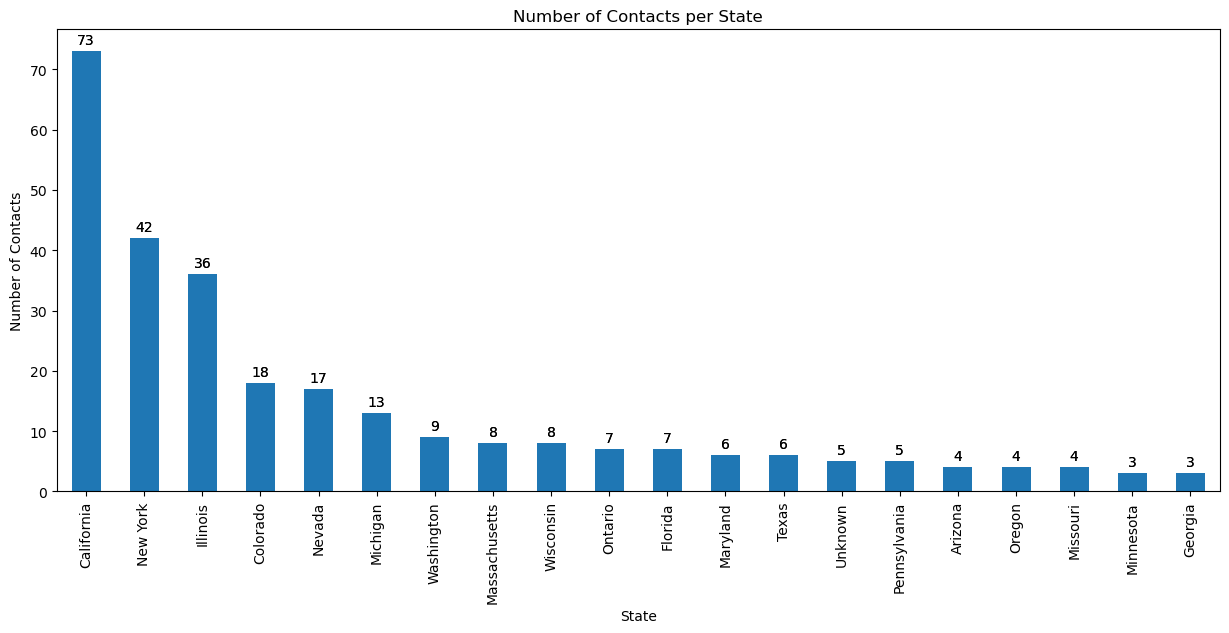

In [16]:
# Bar chart for state distribution with labels
display_graph(state_distribution, 'Number of Contacts per State', 'State', 'Number of Contacts', 15, True)

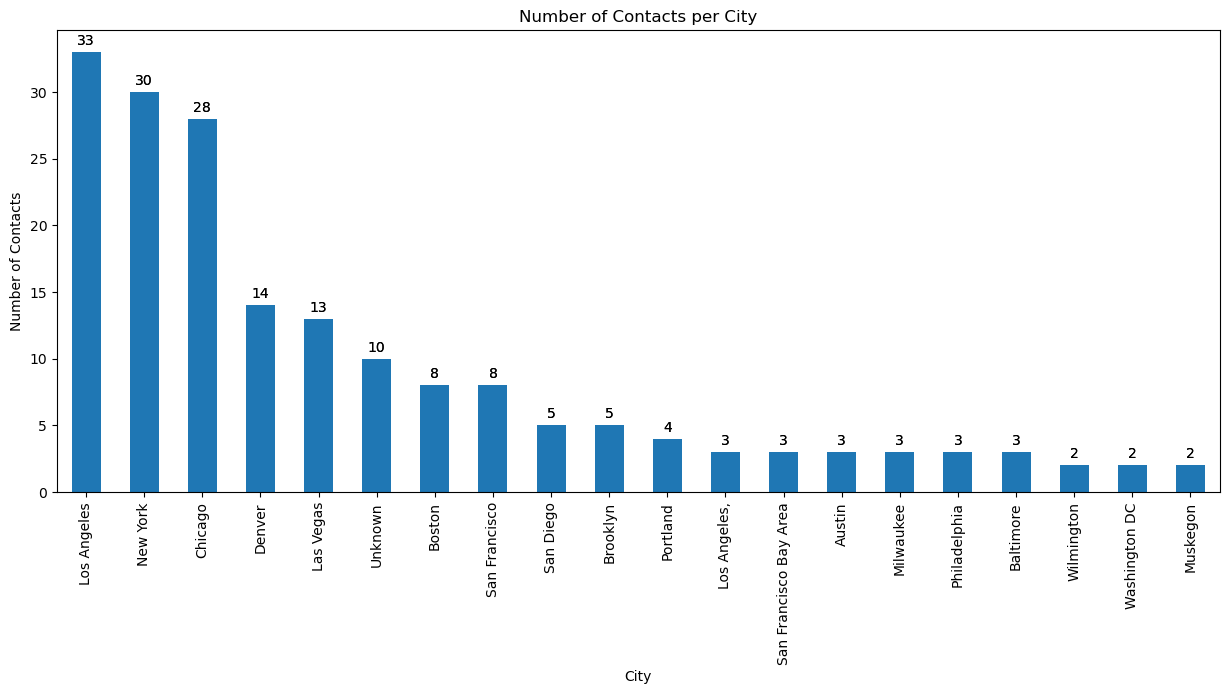

In [17]:
# Bar chart for city distribution with labels
display_graph(city_distribution, 'Number of Contacts per City', 'City', 'Number of Contacts', 15, True)

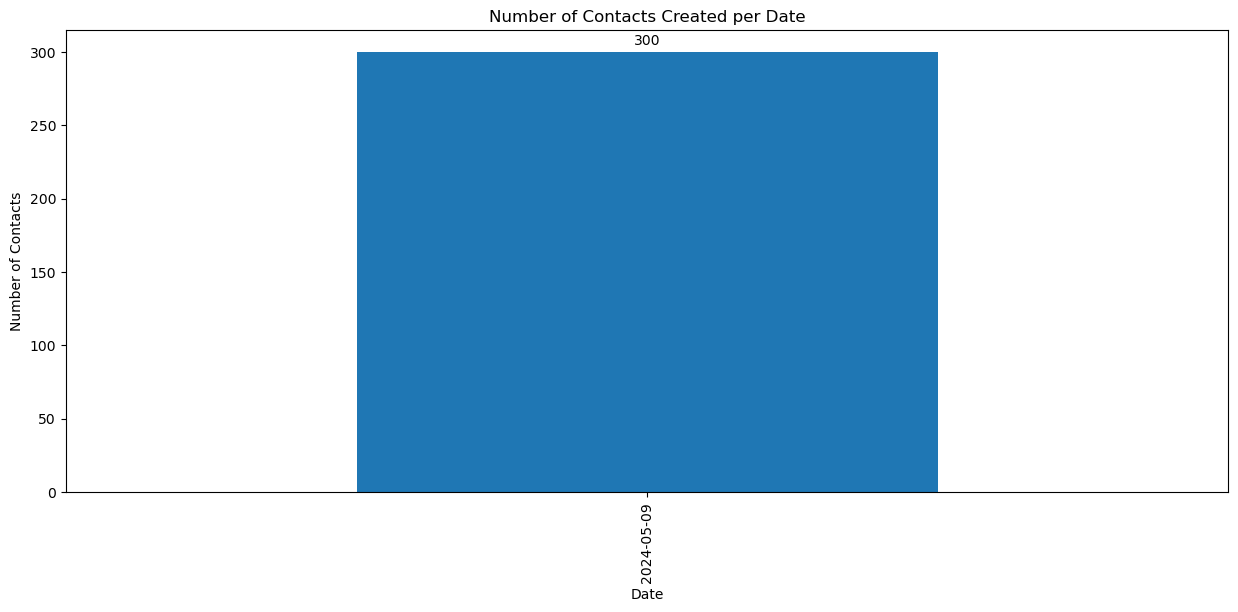

In [18]:
# Histogram for creation dates with labels
display_graph(creation_dates, 'Number of Contacts Created per Date', 'Date', 'Number of Contacts', 15)

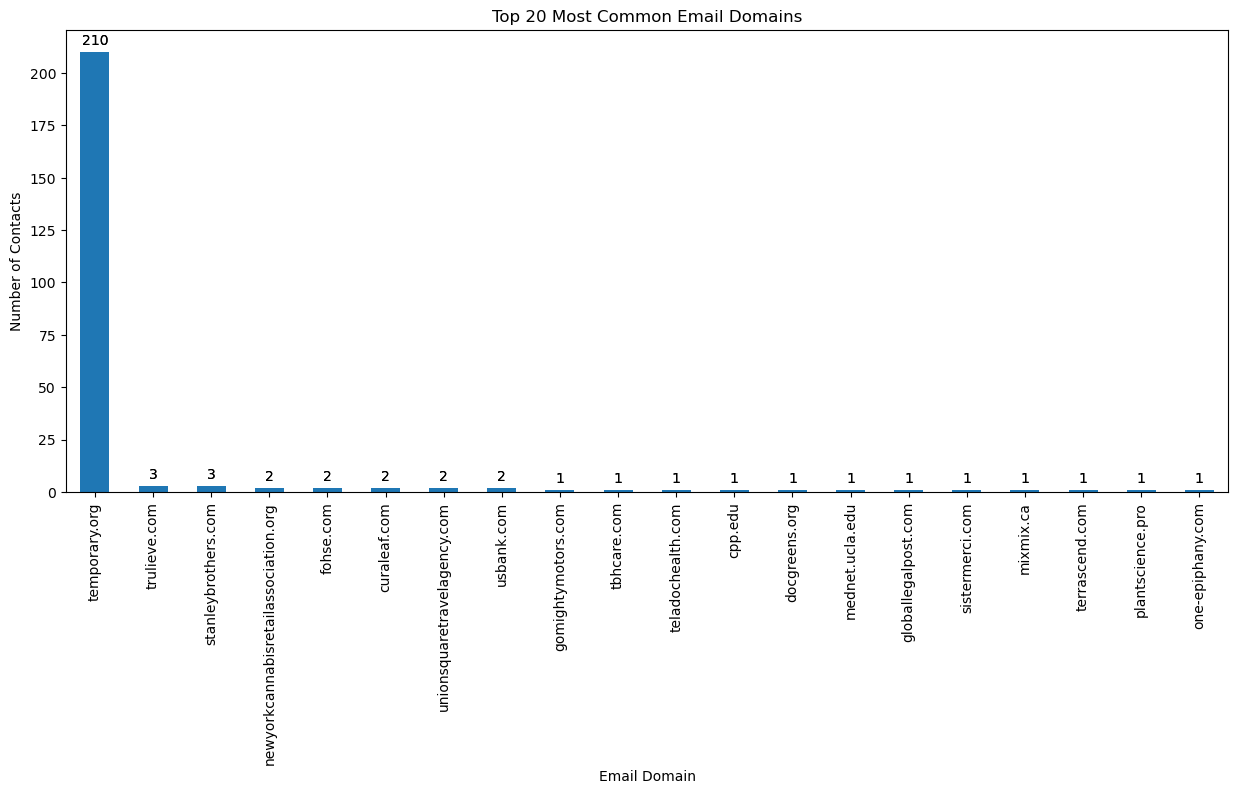

In [19]:
# Extract email domains
contacts_df_cleaned['email_domain'] = contacts_df_cleaned['email'].apply(lambda x: x.split('@')[1])

# Count the occurrences of each domain
domain_counts = contacts_df_cleaned['email_domain'].value_counts()

# Display the top 20 most common email domains
display_graph(domain_counts, 'Top 20 Most Common Email Domains', 'Email Domain', 'Number of Contacts', 15, True)

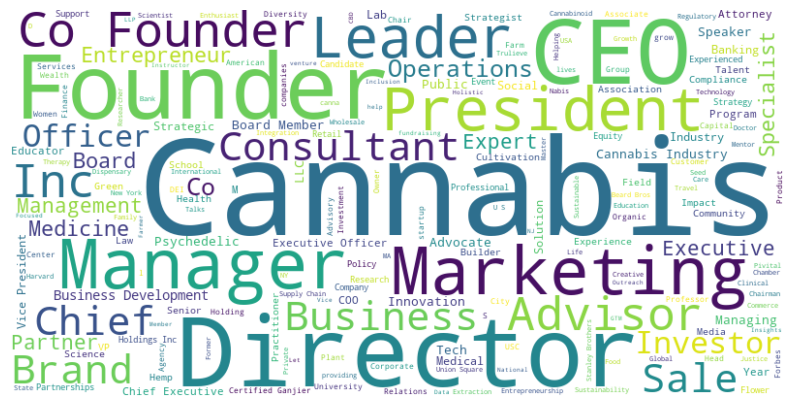

In [22]:
# Combine all descriptions into a single string
all_descriptions = ' '.join(contacts_df_cleaned['description'])

generate_word_cloud(all_descriptions)